# Módulo Final: Comparación con Conjunto de Pruebas Final

**Autor:** Pablo Spínola López

**Descripción:** Este notebook realiza la evaluación de cada uno de los 8 modelos desarrollados a lo largo del reto con el conjunto de pruebas final, mostrando el reporte de clasificación, la matriz de confusión, la gráfica ROC y los valores de AUC, TPR, FPR

Importación de todas las librerías necesarias para el entrenamiento

In [2]:
# Reporte de clasificación
from sklearn.metrics import classification_report

# Carga de Llama y langchain
from langchain_ollama.llms import OllamaLLM
from langchain.chains import LLMChain

# Visualización de métricas
import matplotlib.pyplot as plt

# Acceso a archivos
import sys
import os

# Carga de modelos y manejo de datos
import pickle
import pandas as pd

Importamos las funciones centralizadas

In [3]:
#FUNCIONES PERSONALIZADAS PARA LOS MODELOS
sys.path.append(os.path.abspath("../funciones"))

#IMPORAR FUNCIONES AUXILIARES PARA EL ENTRENAMIENTO
from funcionesEntrenamiento import (
    reporte_clasificacion,
    crear_matriz_confusion,
    calcular_roc_auc,
    metricas_tpr_fpr,
)

#IMPORTAR FUNCIÓN PARA PROBAR ENSAMBLE
from funcionesEntrenamientoEnsamble import (
    probar_ensamble,
)

#IMPORTAR FUNCIONES AUXILIARES PARA LLM
from funcionesEntrenamientoLLM import (
    prompt,
    obtener_predicciones,
    reporte_clasificacion_llm,
)

#IMPORTAR FUNCIONES PARA RoBERTa
from funcionesEntrenamientoRoBERTa import(
    obtener_probs,
    cargar_estado_modelo,
    data4embed,
    get_embeddings

)

Some weights of RobertaModel were not initialized from the model checkpoint at PlanTL-GOB-ES/roberta-base-bne and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Carga de modelos entrenados

In [16]:
print("Cargando modelos entrenados...\n")
model_path = os.path.abspath("../../models")

with open(os.path.join(model_path, 'modelCatBoost.pkl'), 'rb') as file:
    modelCatBoost = pickle.load(file)
    print("Modelo CatBoost cargado en una variable.")

with open(os.path.join(model_path, 'modelLGBM.pkl'), 'rb') as file:
    modelLGBM = pickle.load(file)
    print("Modelo LightGBM cargado en una variable.")

with open(os.path.join(model_path, 'modelMLP.pkl'), 'rb') as file:
    modelMLP = pickle.load(file)
    print("Modelo MLP cargado en una variable.")

with open(os.path.join(model_path, 'modelPAC.pkl'), 'rb') as file:
    modelPAC = pickle.load(file)
    print("Modelo PAC cargado en una variable.")

with open(os.path.join(model_path, 'modelRF.pkl'), 'rb') as file:
    modelRF = pickle.load(file)
    print("Modelo RF cargado en una variable.")

with open(os.path.join(model_path, 'modelSVM.pkl'), 'rb') as file:
    modelSVM = pickle.load(file)
    print("Modelo SVM cargado en una variable.")

with open(os.path.join(model_path, 'modelXGB.pkl'), 'rb') as file:
    modelXGB = pickle.load(file)
    print("Modelo XGB cargado en una variable.")

with open(os.path.join(model_path, 'metaModelEns.pkl'), 'rb') as file:
    metaModel = pickle.load(file)
    print("Metamodelo cargado en una variable.")

path_ROBERTA = os.path.join(model_path, 'final_best_model.pt')
bestModelROBERTA = cargar_estado_modelo()
print("Modelo RoBERTa cargado en una variable.")

Cargando modelos entrenados...

Modelo CatBoost cargado en una variable.
Modelo LightGBM cargado en una variable.
Modelo MLP cargado en una variable.
Modelo PAC cargado en una variable.
Modelo RF cargado en una variable.
Modelo SVM cargado en una variable.
Modelo XGB cargado en una variable.
Metamodelo cargado en una variable.


Some weights of RobertaModel were not initialized from the model checkpoint at PlanTL-GOB-ES/roberta-base-bne and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Modelo RoBERTa cargado en una variable.


### Carga de conjuntos de pruebas finales

Carga de conjunto de pruebas final numérico

In [5]:
print("Cargando datos para modelos numéricos...")
df = pd.read_csv("../../data/ds_tradicional_TEST_FINAL.csv", encoding="utf-8", header=0)

print(df.shape)
df.head(5)

Cargando datos para modelos numéricos...
(250, 1569)


,longitud_texto,num_palabras,comida,restriccion,purga,imagen_corporal,ejercicio,polaridad,subjetividad,tag_Anorexia,...,tfidf_1491,tfidf_1492,tfidf_1493,tfidf_1494,tfidf_1495,tfidf_1496,tfidf_1497,tfidf_1498,tfidf_1499,class
0,-0.483373,-0.283019,0,0,0,0,0,0.486894,0.753341,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2.315037,2.366144,0,1,0,1,1,-0.194929,0.542246,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.382234,1.703853,0,1,0,0,0,0.798344,0.405655,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-1.295814,-1.166073,0,0,0,0,0,0.259620,-0.538062,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,-0.874548,-0.724546,2,2,0,0,0,-0.346445,-1.134095,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


Carga de conjunto de pruebas final para RoBERTa

In [6]:
print("Cargando datos para modelo BERT...")
df_BERT = pd.read_csv("../../data/ds_BETO_TEST_FINAL.csv", encoding="utf-8", header=0)

print(df_BERT.shape)
df_BERT.head(5)

Cargando datos para modelo BERT...
(250, 2)


,texto_bert,class
0,no es malo ayunar 20 dias al mes ... ya que no...,1
1,"¡7 días, 7 razones para entrenar! - llegamos a...",0
2,"de avena, banana (o plátano) y cacao súper san...",0
3,cuanto pesan ustedes yo 29,1
4,como bajar peso comiendo sin parar.. Etiquetas...,1


Carga de conjunto de pruebas final para LLM

In [7]:
print("Cargando datos para LLM...")
df_LLM = pd.read_csv("../../data/data_test_fold2.csv", encoding="utf-8", header=0)

print(df_LLM.shape)
df_LLM.head(5)

Cargando datos para LLM...
(250, 4)


,user_id,tweet_id,tweet_text,class
0,user1502,c1a446a05987,no es malo ayunar 20 dias al mes ... ya que no...,anorexia
1,user1503,bfdce07b546c,"¡7 días, 7 razones para entrenar!\n-\nLlegamos...",control
2,user1504,860a2eced012,"#Cookies de avena, banana (o plátano) y cacao ...",control
3,user1505,b745c4311c24,cuanto pesan ustedes\nyo 29,anorexia
4,user1506,fdcb32f44ce7,Como bajar peso comiendo sin parar.\n #Tips,anorexia


### División de los conjuntos finales en conjunto de valores y clases

División de conjunto tradicional

In [8]:
X = df.drop(columns=['class'])
y = df['class']

División de conjunto de RoBERTa

In [9]:
X_BERT = df_BERT['texto_bert'].tolist()
y_BERT = df_BERT['class'].tolist()

División de conjunto para LLM

In [10]:
X_LLM = df_LLM['tweet_text']
y_LLM = df_LLM["class"].map({'control': 0, 'anorexia': 1})

División de conjunto para modelos tradicionales con embeddings

In [11]:
X_Embeded = get_embeddings(X_BERT)
y_Embeded = y_BERT

# Evaluación final CatBoost

In [12]:
#CREACIÓN DEL REPORTE DE CLASIFICACIÓN
y_pred_cb, y_scores_cb, reporte_cb = reporte_clasificacion(X_Embeded, y_Embeded, modelCatBoost)

print("Classification Report:")
print(reporte_cb)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       116
           1       0.85      0.88      0.86       134

    accuracy                           0.85       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250



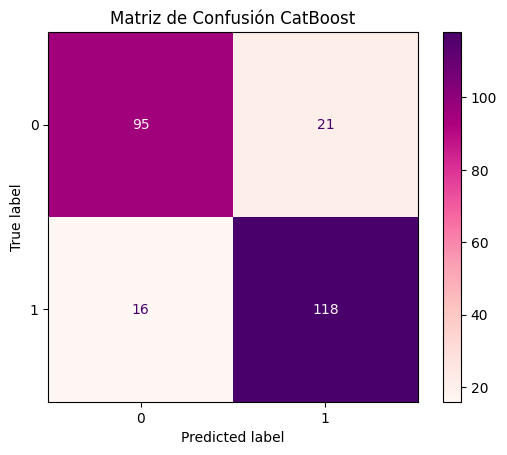

In [13]:
# Matriz de confusión
cm_cb, disp_cb = crear_matriz_confusion(y_Embeded, y_pred_cb)
disp_cb.plot(cmap='RdPu')
plt.title("Matriz de Confusión CatBoost")
plt.show()

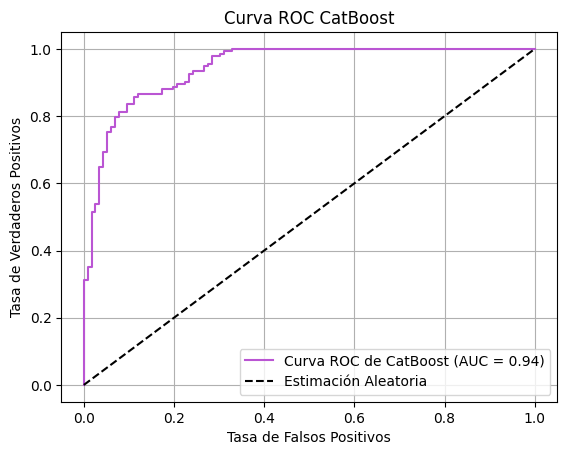

In [14]:
# Predicciones de probabilidad (para curva ROC)
fpr_cb, tpr_cb, thresholds_cb, auc_score_cb = calcular_roc_auc(y_Embeded, y_scores_cb)

# Gráfica ROC
plt.figure()
plt.plot(fpr_cb, tpr_cb, color='mediumorchid', label=f"Curva ROC de CatBoost (AUC = {auc_score_cb:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Estimación Aleatoria")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC CatBoost")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [15]:
# Cálculo de métricas de desempeño de la matriz de confusión
TPR_cb, FPR_cb = metricas_tpr_fpr(cm_cb)

# Mostrar métricas
print(f"AUC: {(auc_score_cb * 100):.4f}")
print(f"TPR (True Positive Rate): {(TPR_cb * 100):.4f}")
print(f"FPR (False Positive Rate): {(FPR_cb * 100):.4f}")

AUC: 94.4030
TPR (True Positive Rate): 88.0597
FPR (False Positive Rate): 18.1034


# Evaluación final LightGBM

In [18]:
#CREACIÓN DEL REPORTE DE CLASIFICACIÓN
y_pred_lgbm, y_scores_lgbm, reporte_lgbm = reporte_clasificacion(X_Embeded, y_Embeded, modelLGBM)

print("Classification Report:")
print(reporte_lgbm)

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
Classification Report:
              precision    recall  f1-score   support

           0    

c:\Users\saaso\miniconda3\envs\ia-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\saaso\miniconda3\envs\ia-env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


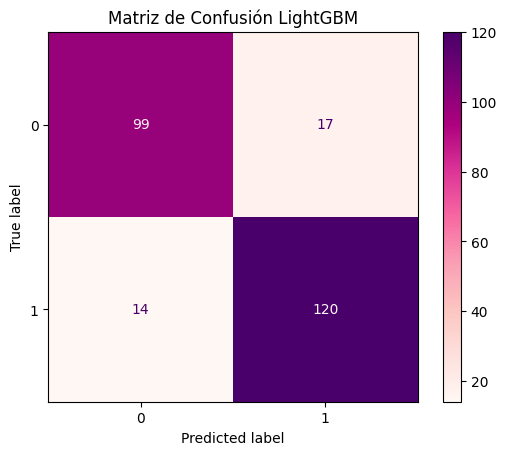

In [24]:
# Matriz de confusión
cm_lgbm, disp_lgbm = crear_matriz_confusion(y_Embeded, y_pred_lgbm)
disp_lgbm.plot(cmap='RdPu')
plt.title("Matriz de Confusión LightGBM")
plt.show()

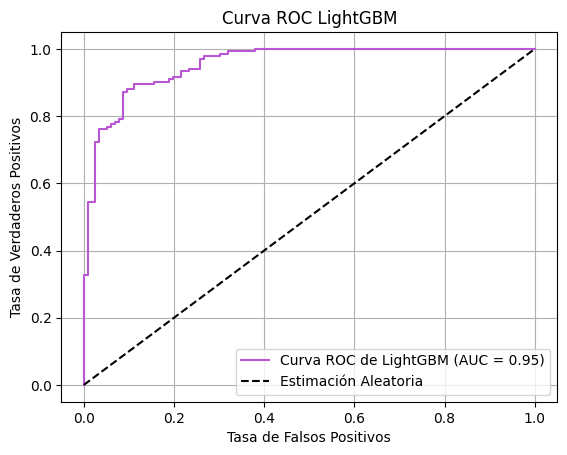

In [21]:
# Predicciones de probabilidad (para curva ROC)
fpr_lgbm, tpr_lgbm, thresholds_lgbm, auc_score_lgbm = calcular_roc_auc(y_Embeded, y_scores_lgbm)

# Gráfica ROC
plt.figure()
plt.plot(fpr_lgbm, tpr_lgbm, color='mediumorchid', label=f"Curva ROC de LightGBM (AUC = {auc_score_lgbm:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Estimación Aleatoria")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC LightGBM")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [30]:
# Cálculo de métricas de desempeño de la matriz de confusión
TPR_lgbm, FPR_lgbm = metricas_tpr_fpr(cm_lgbm)

# Mostrar métricas
print(f"AUC: {(auc_score_lgbm * 100):.4f}")
print(f"TPR (True Positive Rate): {(TPR_lgbm * 100):.4f}")
print(f"FPR (False Positive Rate): {(FPR_lgbm * 100):.4f}")

AUC: 95.4645
TPR (True Positive Rate): 89.5522
FPR (False Positive Rate): 14.6552


# Evaluación final MLP

In [25]:
#CREACIÓN DEL REPORTE DE CLASIFICACIÓN
y_pred_MLP, y_proba_MLP, reporte_MLP = reporte_clasificacion(X, y, modelMLP)

print("Reporte Clasificación MLP:")
print(reporte_MLP)

Reporte Clasificación MLP:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       116
           1       0.89      0.93      0.91       134

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250



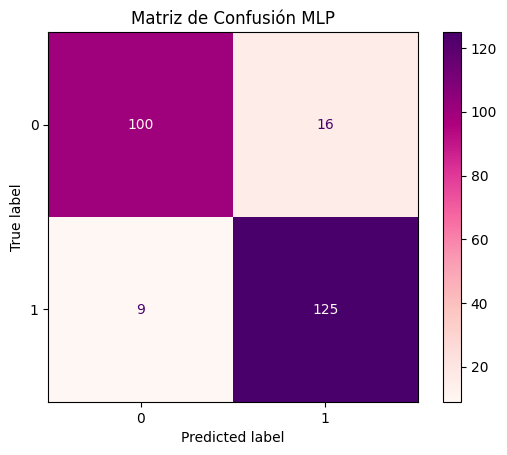

In [26]:
# Matriz de confusión
cm_MLP, disp_MLP = crear_matriz_confusion(y, y_pred_MLP)
disp_MLP.plot(cmap='RdPu')
plt.title("Matriz de Confusión MLP")
plt.show()

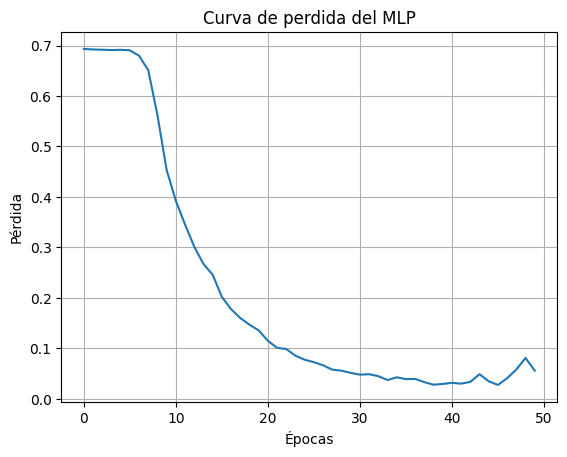

In [27]:
#CURVA DE PERDIDA DEL MLP
plt.plot(modelMLP.loss_curve_)
plt.title("Curva de perdida del MLP")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.grid(True)
plt.show()

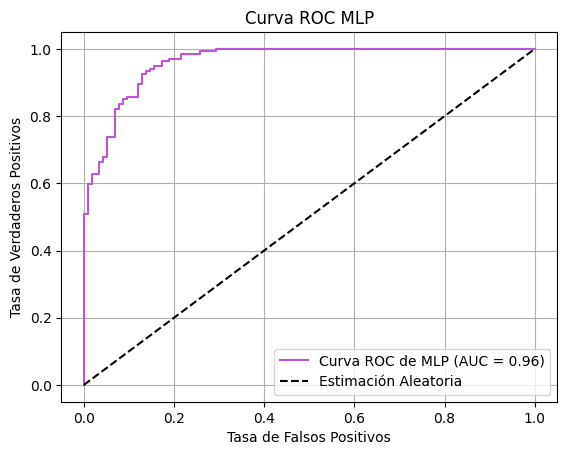

In [28]:
# Predicciones de probabilidad (para curva ROC)
fpr_MLP, tpr_MLP, thresholds_MLP, auc_score_MLP = calcular_roc_auc(y, y_proba_MLP)

# Gráfica ROC
plt.figure()
plt.plot(fpr_MLP, tpr_MLP, color='mediumorchid', label=f"Curva ROC de MLP (AUC = {auc_score_MLP:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Estimación Aleatoria")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC MLP")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [29]:
# Cálculo de métricas de desempeño de la matriz de confusión
TPR_MLP, FPR_MLP = metricas_tpr_fpr(cm_MLP)

# Mostrar métricas
print(f"AUC: {(auc_score_MLP * 100):.4f}")
print(f"TPR (True Positive Rate): {(TPR_MLP * 100):.4f}")
print(f"FPR (False Positive Rate): {(FPR_MLP * 100):.4f}")

AUC: 96.1915
TPR (True Positive Rate): 93.2836
FPR (False Positive Rate): 13.7931


# Evaluación final Random Forest

In [15]:
#CREACIÓN DEL REPORTE DE CLASIFICACIÓN
y_pred_RF, y_proba_RF, reporte_RF = reporte_clasificacion(X, y, modelRF)

print("Reporte Clasificación Random Forest:")
print(reporte_RF)

Reporte Clasificación Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.77      0.84       116
           1       0.83      0.96      0.89       134

    accuracy                           0.87       250
   macro avg       0.88      0.86      0.86       250
weighted avg       0.88      0.87      0.87       250



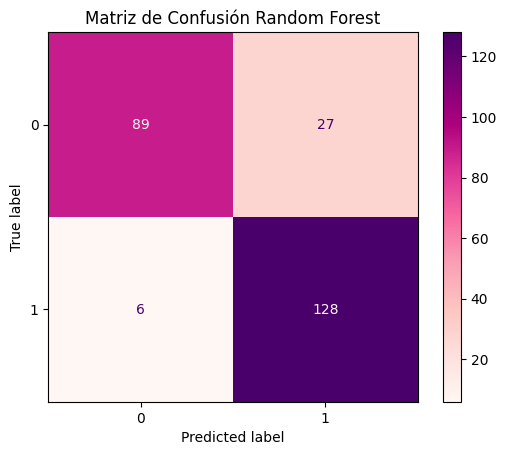

In [16]:
# Matriz de confusión
cm_RF, disp_RF = crear_matriz_confusion(y, y_pred_RF)
disp_RF.plot(cmap='RdPu')
plt.title("Matriz de Confusión Random Forest")
plt.show()

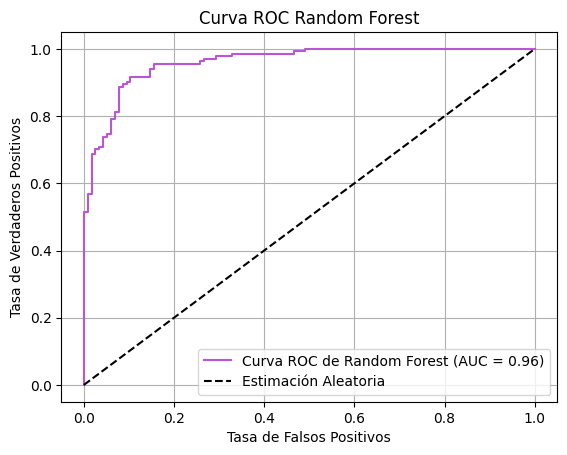

In [17]:
# Predicciones de probabilidad (para curva ROC)
fpr_RF, tpr_RF, thresholds_RF, auc_score_RF = calcular_roc_auc(y, y_proba_RF)

# Gráfica ROC
plt.figure()
plt.plot(fpr_RF, tpr_RF, color='mediumorchid', label=f"Curva ROC de Random Forest (AUC = {auc_score_RF:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Estimación Aleatoria")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [18]:
# Cálculo de métricas de desempeño de la matriz de confusión
TPR_RF, FPR_RF = metricas_tpr_fpr(cm_RF)

# Mostrar métricas
print(f"AUC: {(auc_score_RF * 100):.4f}")
print(f"TPR (True Positive Rate): {(TPR_RF * 100):.4f}")
print(f"FPR (False Positive Rate): {(FPR_RF * 100):.4f}")

AUC: 96.0950
TPR (True Positive Rate): 95.5224
FPR (False Positive Rate): 23.2759


# Evaluación final Passive Aggressive Classifier

In [19]:
#CREACIÓN DEL REPORTE DE CLASIFICACIÓN
y_pred_PAC, y_proba_PAC, reporte_PAC = reporte_clasificacion(X, y, modelPAC, True)

print("Classification Report Passive Agressive:")
print(reporte_PAC)

Classification Report Passive Agressive:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       116
           1       0.87      0.93      0.90       134

    accuracy                           0.88       250
   macro avg       0.89      0.88      0.88       250
weighted avg       0.89      0.88      0.88       250



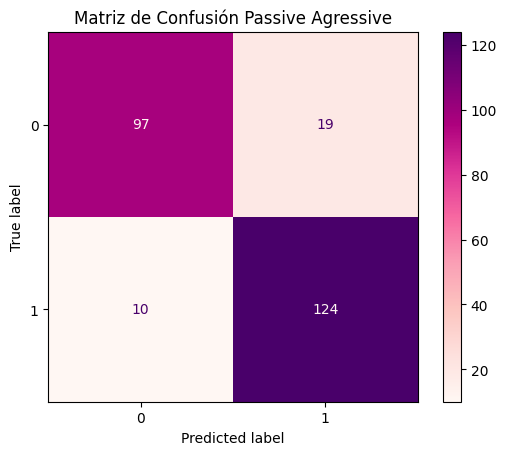

In [20]:
# Matriz de confusión
cm_PAC, disp_PAC = crear_matriz_confusion(y, y_pred_PAC)
disp_PAC.plot(cmap='RdPu')
plt.title("Matriz de Confusión Passive Agressive")
plt.show()

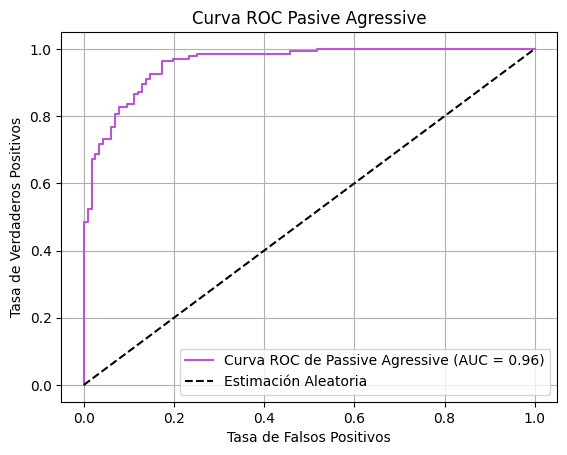

In [21]:
# Predicciones de probabilidad (para curva ROC)
fpr_PAC, tpr_PAC, thresholds_PAC, auc_score_PAC = calcular_roc_auc(y, y_proba_PAC)

# Gráfica ROC
plt.figure()
plt.plot(fpr_PAC, tpr_PAC, color='mediumorchid', label=f"Curva ROC de Passive Agressive (AUC = {auc_score_PAC:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Estimación Aleatoria")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC Pasive Agressive")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [22]:
# Cálculo de métricas de desempeño de la matriz de confusión
TPR_PAC, FPR_PAC = metricas_tpr_fpr(cm_PAC)

# Mostrar métricas
print(f"AUC: {(auc_score_PAC * 100):.4f}")
print(f"TPR (True Positive Rate): {(TPR_PAC * 100):.4f}")
print(f"FPR (False Positive Rate): {(FPR_PAC * 100):.4f}")

AUC: 95.7604
TPR (True Positive Rate): 92.5373
FPR (False Positive Rate): 16.3793


# Evaluación final SVM

In [23]:
#CREACIÓN DEL REPORTE DE CLASIFICACIÓN
y_pred_SVM, y_proba_SVM, reporte_SVM = reporte_clasificacion(X, y, modelSVM)

print("Classification Report SVM:")
print(reporte_SVM)

Classification Report SVM:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       116
           1       0.87      0.98      0.92       134

    accuracy                           0.91       250
   macro avg       0.92      0.91      0.91       250
weighted avg       0.92      0.91      0.91       250



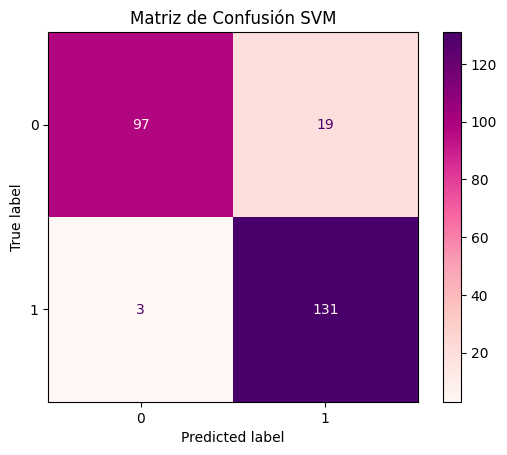

In [24]:
# Matriz de confusión
cm_SVM, disp_SVM = crear_matriz_confusion(y, y_pred_SVM)
disp_SVM.plot(cmap='RdPu')
plt.title("Matriz de Confusión SVM")
plt.show()

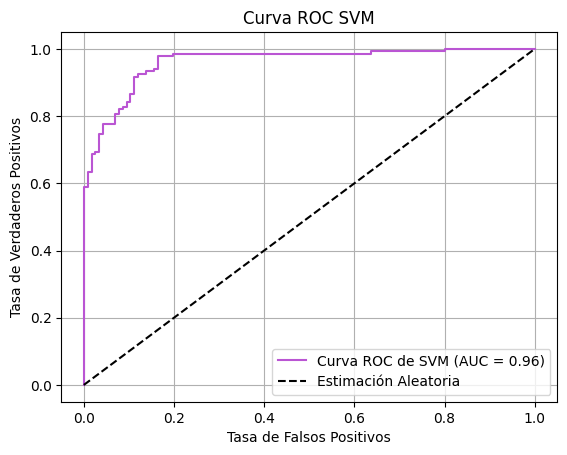

In [25]:
# Predicciones de probabilidad (para curva ROC)
fpr_SVM, tpr_SVM, thresholds_SVM, auc_score_SVM = calcular_roc_auc(y, y_proba_SVM)

# Gráfica ROC
plt.figure()
plt.plot(fpr_SVM, tpr_SVM, color='mediumorchid', label=f"Curva ROC de SVM (AUC = {auc_score_SVM:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Estimación Aleatoria")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC SVM")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [26]:
# Cálculo de métricas de desempeño de la matriz de confusión
TPR_SVM, FPR_SVM = metricas_tpr_fpr(cm_SVM)

# Mostrar métricas
print(f"AUC: {(auc_score_SVM * 100):.4f}")
print(f"TPR (True Positive Rate): {(TPR_SVM * 100):.4f}")
print(f"FPR (False Positive Rate): {(FPR_SVM * 100):.4f}")

AUC: 96.0564
TPR (True Positive Rate): 97.7612
FPR (False Positive Rate): 16.3793


# Evaluación final XGBoost

In [27]:
#CREACIÓN DEL REPORTE DE CLASIFICACIÓN
y_pred_XGB, y_proba_XGB, reporte_XGB = reporte_clasificacion(X, y, modelXGB)

print("Classification Report XGBoost:")
print(reporte_XGB)

Classification Report XGBoost:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       116
           1       0.81      0.87      0.84       134

    accuracy                           0.82       250
   macro avg       0.83      0.82      0.82       250
weighted avg       0.83      0.82      0.82       250



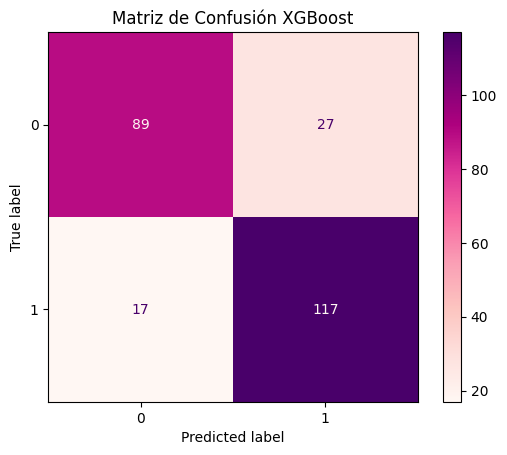

In [28]:
# Matriz de confusión
cm_XGB, disp_XGB = crear_matriz_confusion(y, y_pred_XGB)
disp_XGB.plot(cmap='RdPu')
plt.title("Matriz de Confusión XGBoost")
plt.show()

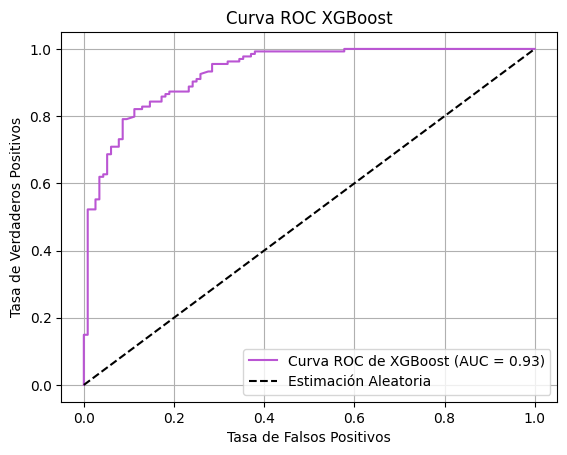

In [29]:
# Predicciones de probabilidad (para curva ROC)
fpr_XGB, tpr_XGB, thresholds_XGB, auc_score_XGB = calcular_roc_auc(y, y_proba_XGB)

# Gráfica ROC
plt.figure()
plt.plot(fpr_XGB, tpr_XGB, color='mediumorchid', label=f"Curva ROC de XGBoost (AUC = {auc_score_XGB:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Estimación Aleatoria")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC XGBoost")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [30]:
# Cálculo de métricas de desempeño de la matriz de confusión
TPR_XGB, FPR_XGB = metricas_tpr_fpr(cm_XGB)

# Mostrar métricas
print(f"AUC: {(auc_score_XGB * 100):.4f}")
print(f"TPR (True Positive Rate): {(TPR_XGB * 100):.4f}")
print(f"FPR (False Positive Rate): {(FPR_XGB * 100):.4f}")

AUC: 93.1613
TPR (True Positive Rate): 87.3134
FPR (False Positive Rate): 23.2759


# Evaluación final MetaModelo: Random Forest

Preparación de conjunto para evaluación de ensamble

In [31]:
X_meta = probar_ensamble(X)

In [32]:
y_pred_ensamble, y_proba_ensamble, reporte_ensamble = reporte_clasificacion(X_meta, y, metaModel)

print("Classification Report Ensamble:")
print(reporte_ensamble)

Classification Report Ensamble:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       116
           1       0.88      0.94      0.91       134

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250



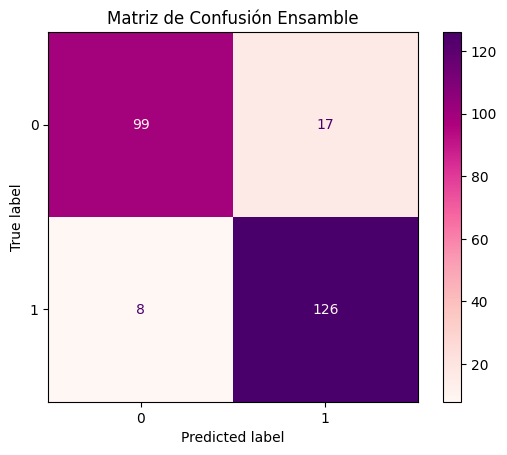

In [33]:
# Matriz de confusión
cm_ensamble, disp_ensamble = crear_matriz_confusion(y, y_pred_ensamble)
disp_ensamble.plot(cmap='RdPu')
plt.title("Matriz de Confusión Ensamble")
plt.show()

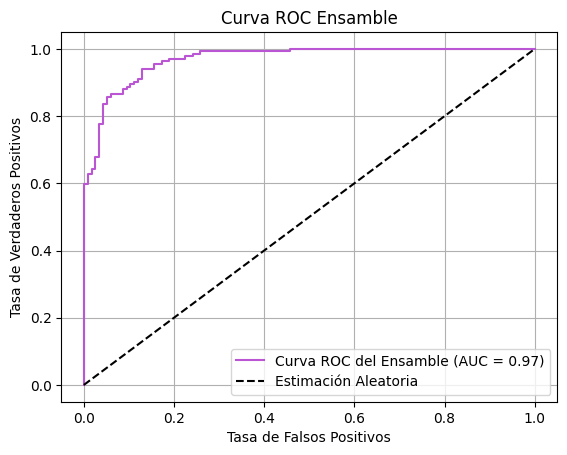

In [34]:
# Predicciones de probabilidad (para curva ROC)
fpr_ensamble, tpr_ensamble, thresholds_ensamble, auc_score_ensamble = calcular_roc_auc(y, y_proba_ensamble)

# Gráfica ROC
plt.figure()
plt.plot(fpr_ensamble, tpr_ensamble, color='mediumorchid', label=f"Curva ROC del Ensamble (AUC = {auc_score_ensamble:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Estimación Aleatoria")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC Ensamble")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [35]:
# Cálculo de métricas de desempeño de la matriz de confusión
TPR_ensamble, FPR_ensamble = metricas_tpr_fpr(cm_ensamble)

# Mostrar métricas
print(f"AUC: {(auc_score_ensamble * 100):.4f}")
print(f"TPR (True Positive Rate): {(TPR_ensamble * 100):.4f}")
print(f"FPR (False Positive Rate): {(FPR_ensamble * 100):.4f}")

AUC: 96.8798
TPR (True Positive Rate): 94.0299
FPR (False Positive Rate): 14.6552


# Evaluación final RoBERTa

Usamos el modelo entrenado para evaluar

In [36]:
bestModelROBERTA.eval()

RobertaClassifier(
  (bert): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50262, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): 

In [37]:
y_true_BERT, y_probs_BERT, y_pred_BERT = obtener_probs(X_BERT, y_BERT, bestModelROBERTA)
reporte_BERT = classification_report(y_true_BERT, y_pred_BERT)

print("Reporte Clasificación RoBERTa:")
print(reporte_BERT)

Reporte Clasificación RoBERTa:
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91       116
         1.0       0.92      0.93      0.92       134

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



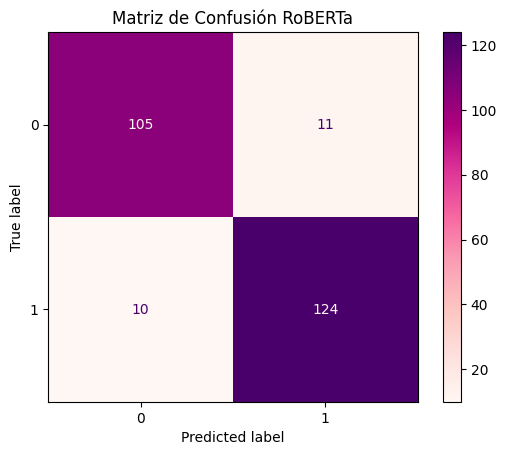

In [38]:
cm_BERT, disp_BERT = crear_matriz_confusion(y_true_BERT, y_pred_BERT)
disp_BERT.plot(cmap='RdPu')
plt.title("Matriz de Confusión RoBERTa")
plt.show()

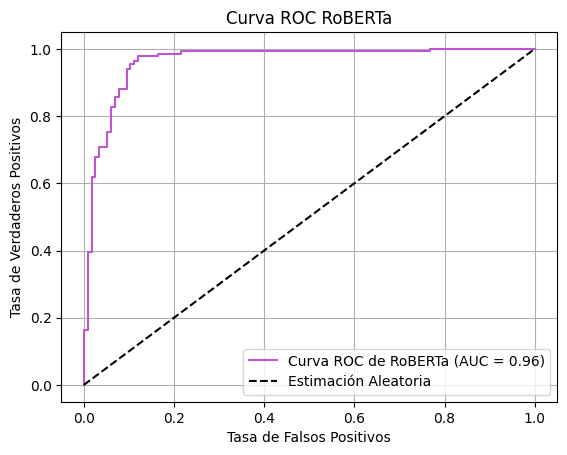

In [39]:
# Predicciones de probabilidad (para curva ROC)
fpr_BERT, tpr_BERT, thresholds_BERT, auc_score_BERT = calcular_roc_auc(y_true_BERT, y_probs_BERT)

# Gráfica ROC
plt.figure()
plt.plot(fpr_BERT, tpr_BERT, color='mediumorchid', label=f"Curva ROC de RoBERTa (AUC = {auc_score_BERT:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Estimación Aleatoria")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC RoBERTa")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [40]:
# Cálculo de métricas de desempeño de la matriz de confusión
TPR_BERT, FPR_BERT = metricas_tpr_fpr(cm_BERT)

# Mostrar métricas
print(f"AUC: {(auc_score_BERT * 100):.4f}")
print(f"TPR (True Positive Rate): {(TPR_BERT * 100):.4f}")
print(f"FPR (False Positive Rate): {(FPR_BERT * 100):.4f}")

AUC: 96.2558
TPR (True Positive Rate): 92.5373
FPR (False Positive Rate): 9.4828


# Evaluación final Llama3

Inicializar modelo LLaMA3 vía Ollama

In [41]:
llm = OllamaLLM(model="llama3")

Creamos el pipeline con el prompt creado en la fase de entrenamiento

In [42]:
chain = LLMChain(prompt=prompt, llm=llm)

C:\Users\saaso\AppData\Local\Temp\ipykernel_13848\3755763389.py:2: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(prompt=prompt, llm=llm)


Con el prompt sacamos todas las predicciones del modelo

In [43]:
# Obtener predicciones
predicciones_LLM = obtener_predicciones(chain, X_LLM)

Clasificando tweets con LLaMA3: 100%|██████████| 250/250 [00:43<00:00,  5.77it/s]


In [44]:
y_preds_LLM, reporte_LLAMA = reporte_clasificacion_llm(predicciones_LLM, y_LLM)

print("Classification Report:")
print(reporte_LLAMA)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.57      0.71       116
           1       0.72      0.96      0.82       134

    accuracy                           0.78       250
   macro avg       0.83      0.77      0.77       250
weighted avg       0.82      0.78      0.77       250



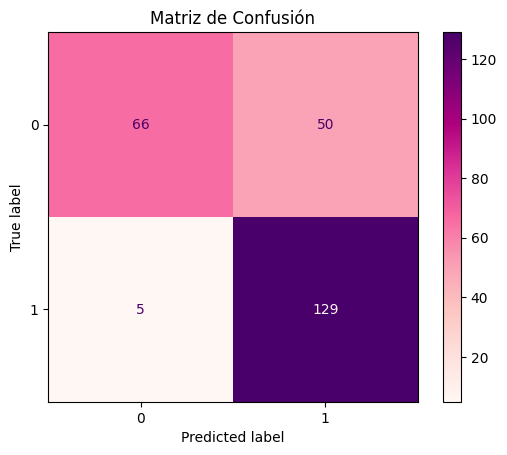

In [45]:
cm_LLM, disp_LLM = crear_matriz_confusion(y_LLM, y_preds_LLM)

disp_LLM.plot(cmap='RdPu')
plt.title("Matriz de Confusión")
plt.show()

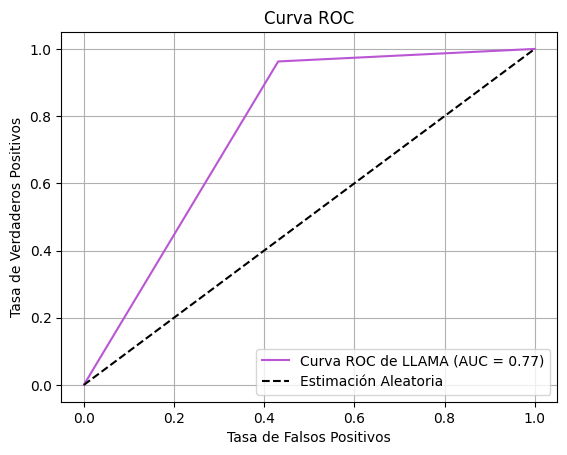

In [46]:
#CURVA ROC
fpr_LLM, tpr_LLM, thresholds_LLM, auc_score_LLM = calcular_roc_auc(y_LLM, y_preds_LLM)

plt.figure()
plt.plot(fpr_LLM, tpr_LLM, color='mediumorchid', label=f"Curva ROC de LLAMA (AUC = {auc_score_LLM:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Estimación Aleatoria")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [47]:
#MÉTRICAS TPR/FPR
TPR_LLM, FPR_LLM = metricas_tpr_fpr(cm_LLM)

# Mostrar métricas
print(f"AUC: {(auc_score_LLM * 100):.4f}")
print(f"TPR (Tasa de Positivos Verdaderos): {(TPR_LLM * 100):.4f}")
print(f"FPR (Tasa de Falsos Positivos): {(FPR_LLM * 100):.4f}")

AUC: 76.5826
TPR (Tasa de Positivos Verdaderos): 96.2687
FPR (Tasa de Falsos Positivos): 43.1034
